In [1]:
# install pnadas datareader
# !pip install pandas-datareader

In [2]:
from User_defined_packages.User_defined_Data_loader import DataLoader
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns',None)

In [3]:
data_loader = DataLoader("Sales-Data-Inventory.xlsx")
data = data_loader.read_data()

Data is from the sheet 0, if you want other sheet data pass the sheet number in Sheet name!


In [4]:
data.head()

,OrderDate,StoreID,EmployeeID,customerid,UnitsSold,OrderQuantity,SalesAmount,DiscountAmount
0,2020-07-10,716.0,180.0,118707.0,142032.0,240,1131.60,56.58
1,2020-07-10,720.0,142.0,118707.0,6127.0,5,184.00,9.20
2,2020-07-10,702.0,121.0,118707.0,5869.0,1,28.75,1.44
3,2020-07-10,719.0,154.0,118707.0,5612.0,9,134.55,6.73
4,2020-07-10,721.0,131.0,118715.0,5782.0,3,110.40,5.52


In [5]:
data.columns

Index(['OrderDate', 'StoreID', 'EmployeeID', 'customerid', 'UnitsSold',
       'OrderQuantity', 'SalesAmount', 'DiscountAmount'],
      dtype='object')

In [6]:
data.OrderDate = pd.to_datetime(data.OrderDate)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229345 entries, 0 to 229344
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrderDate       229345 non-null  datetime64[ns]
 1   StoreID         229343 non-null  float64       
 2   EmployeeID      229343 non-null  float64       
 3   customerid      229269 non-null  float64       
 4   UnitsSold       229265 non-null  float64       
 5   OrderQuantity   229345 non-null  int64         
 6   SalesAmount     229345 non-null  float64       
 7   DiscountAmount  229345 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 14.0 MB


In [8]:
data.reset_index(drop=False,inplace=True)

In [9]:
data.head()

,index,OrderDate,StoreID,EmployeeID,customerid,UnitsSold,OrderQuantity,SalesAmount,DiscountAmount
0,0,2020-07-10,716.0,180.0,118707.0,142032.0,240,1131.60,56.58
1,1,2020-07-10,720.0,142.0,118707.0,6127.0,5,184.00,9.20
2,2,2020-07-10,702.0,121.0,118707.0,5869.0,1,28.75,1.44
3,3,2020-07-10,719.0,154.0,118707.0,5612.0,9,134.55,6.73
4,4,2020-07-10,721.0,131.0,118715.0,5782.0,3,110.40,5.52


In [10]:
new_data = data.groupby('OrderDate').agg({'SalesAmount':'sum','OrderQuantity':'sum'})

In [11]:
new_data.head()

,SalesAmount,OrderQuantity
OrderDate,,
2020-07-02,36796.36,740
2020-07-03,194415.01,7421
2020-07-04,164686.46,8256
2020-07-05,141707.13,7144
2020-07-06,74395.88,4175


<Axes: xlabel='OrderDate'>

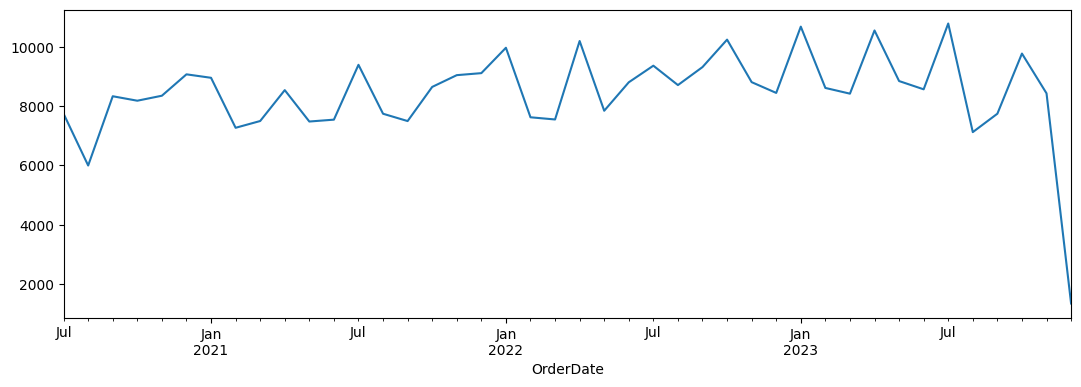

In [12]:
new_data['OrderQuantity'].resample(rule='ME').mean().plot(figsize=(13,4))

In [13]:
new_data = new_data[new_data.index.strftime('%m/%Y') != '12/2023'].copy()

In [14]:
new_data

,SalesAmount,OrderQuantity
OrderDate,,
2020-07-02,36796.36,740
2020-07-03,194415.01,7421
2020-07-04,164686.46,8256
2020-07-05,141707.13,7144
2020-07-06,74395.88,4175
...,...,...
2023-11-26,287881.61,9722
2023-11-27,330198.52,13958
2023-11-28,468406.16,13826


<Axes: xlabel='OrderDate'>

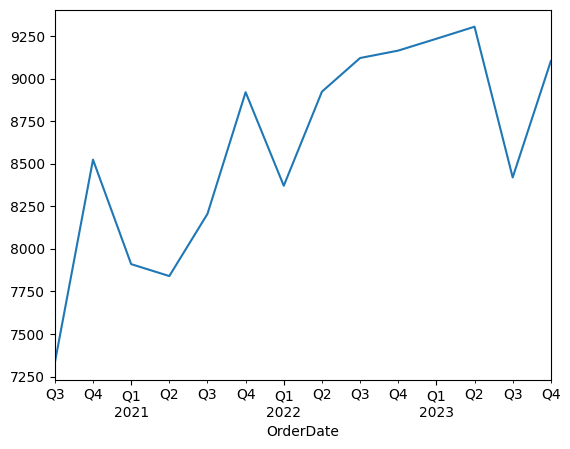

In [15]:
new_data['OrderQuantity'].resample(rule='QS').mean().plot()

<Axes: xlabel='OrderDate'>

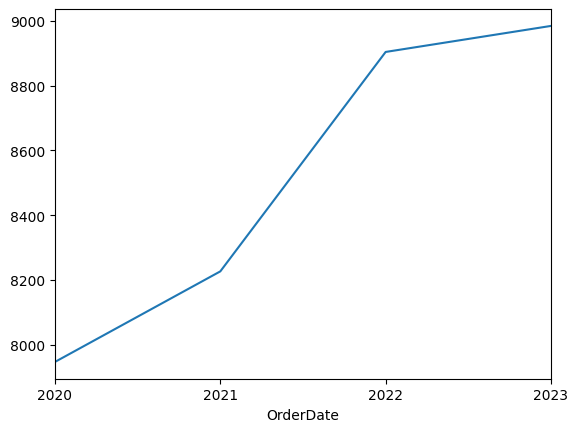

In [16]:
new_data['OrderQuantity'].resample(rule='BYE').mean().plot()

# SME - Simple Moving Average

In [17]:
# SME
new_data['SME'] = new_data['OrderQuantity'].rolling(window=10).mean()

<Axes: xlabel='OrderDate'>

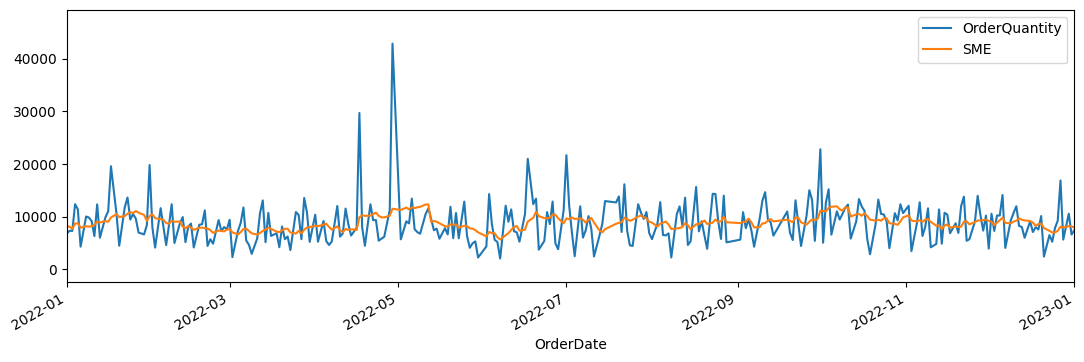

In [18]:
new_data[['OrderQuantity','SME']].plot(xlim=['2022-01-01','2023-01-01'],figsize=(13,4))

# CMA - Cummulative Moving Average

In [19]:
new_data['CMA'] = new_data['OrderQuantity'].expanding().mean()

<Axes: xlabel='OrderDate'>

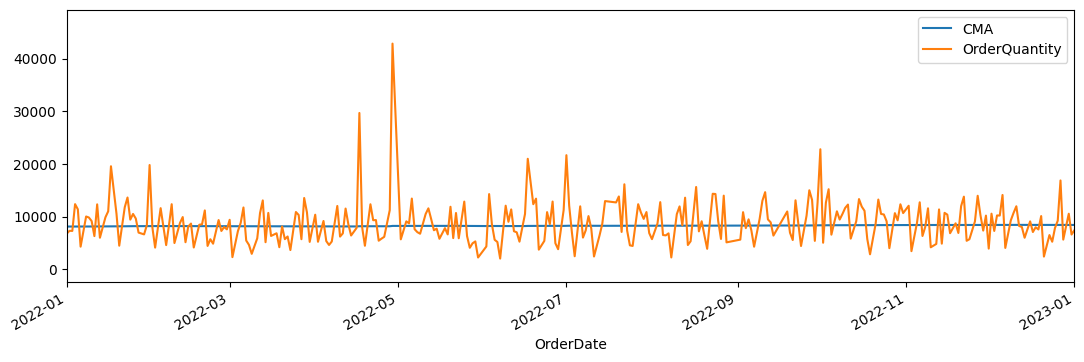

In [20]:
new_data[['CMA','OrderQuantity']].plot(xlim=['2022-01-01','2023-01-01'],figsize=(13,4))

# EMA - Exponential Moving Average

In [21]:
new_data['EMA_0.1'] = new_data['OrderQuantity'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='OrderDate'>

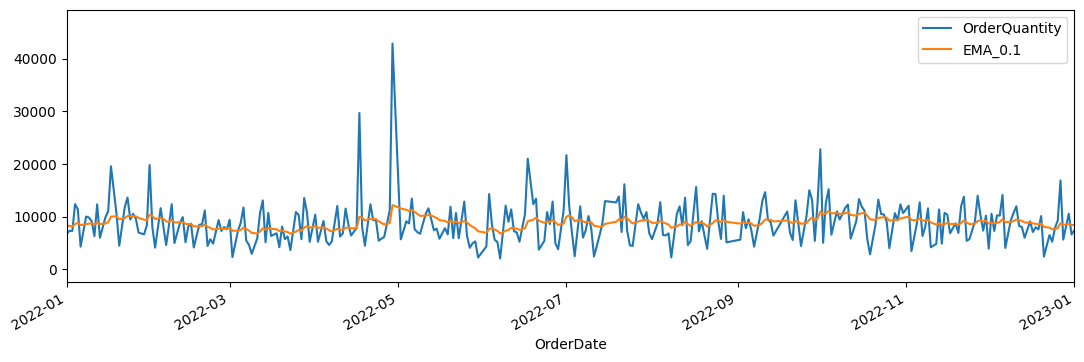

In [22]:
new_data[['OrderQuantity','EMA_0.1']].plot(xlim=['2022-01-01','2023-01-01'],figsize=(13,4))

# EWMA - Exponential Weighted Moving Average

In [23]:
new_data['EMA_5'] = new_data['OrderQuantity'].ewm(span=5).mean()

<Axes: xlabel='OrderDate'>

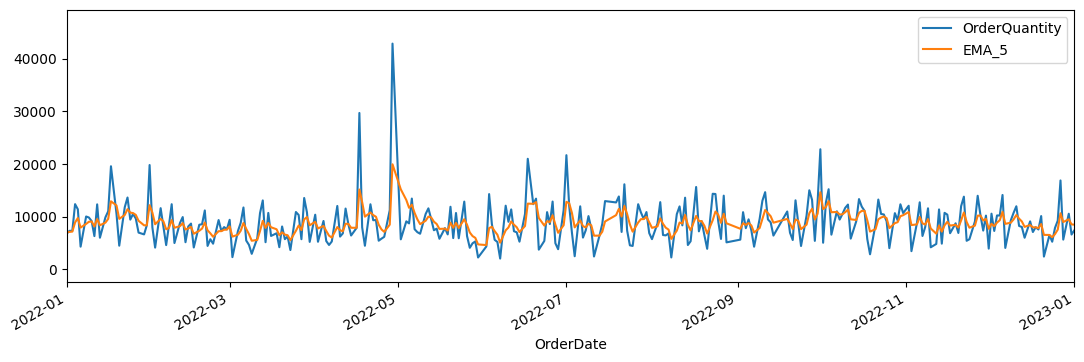

In [24]:
new_data[['OrderQuantity','EMA_5']].plot(xlim=['2022-01-01','2023-01-01'],figsize=(13,4))

In [25]:
monthly_data = pd.DataFrame(new_data['OrderQuantity'].resample(rule='ME').mean())

In [26]:
monthly_data.index = monthly_data.index.strftime('%m/%Y') 

<Axes: xlabel='OrderDate'>

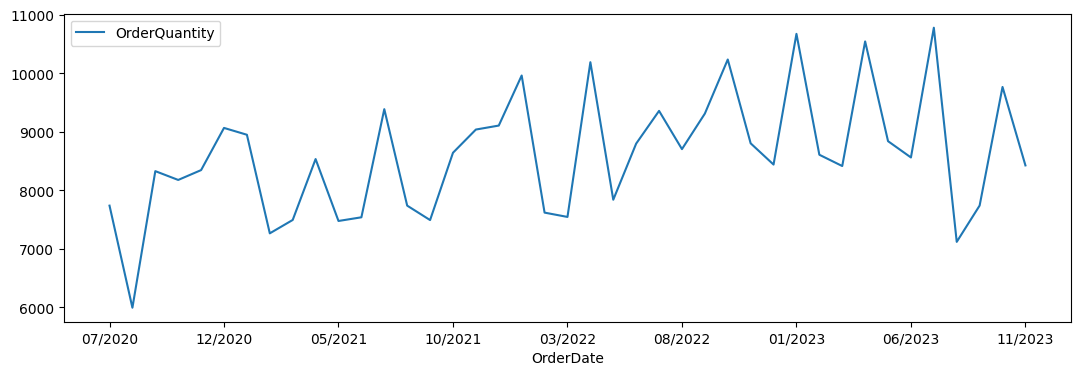

In [27]:
monthly_data.plot(figsize=(13,4))

In [63]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller

def augmented_DFU_roottest(data):
    results = adfuller(data)
    return results[1]

In [64]:
def converting_to_stationary(data,count):
    diff_count = count
    p_value = augmented_DFU_roottest(data)
    if p_value <= 0.05:
        return data,diff_count
    else:
        diff_count+=1
        diff_data = data-data.shift(1)
        
        '''
        for seasonal data
        diff_data = data-data.shift(12)
        
        '''
        stationary_data,d_value = converting_to_stationary(diff_data.dropna(),diff_count)
        return stationary_data,d_value

In [65]:
stationary_data,d_value = converting_to_stationary(monthly_data['OrderQuantity'],0)

In [66]:
d_value

1

<Axes: xlabel='OrderDate'>

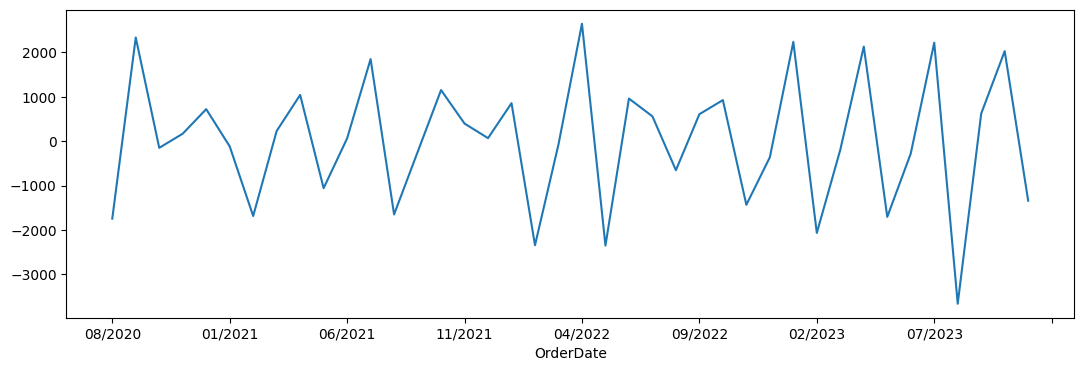

In [67]:
stationary_data.plot(figsize=(13,4))

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

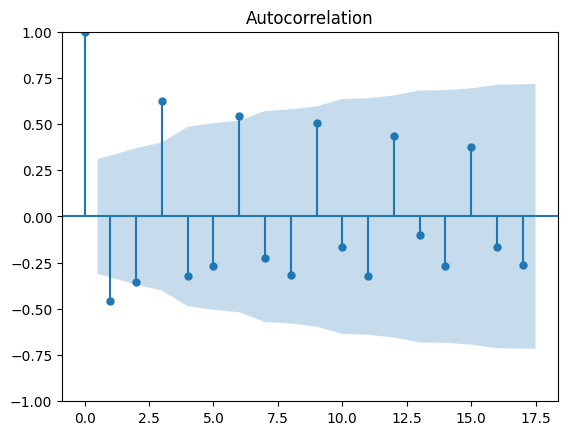

In [58]:
acf = plot_acf(stationary_data.dropna())
# Q-Value is 3

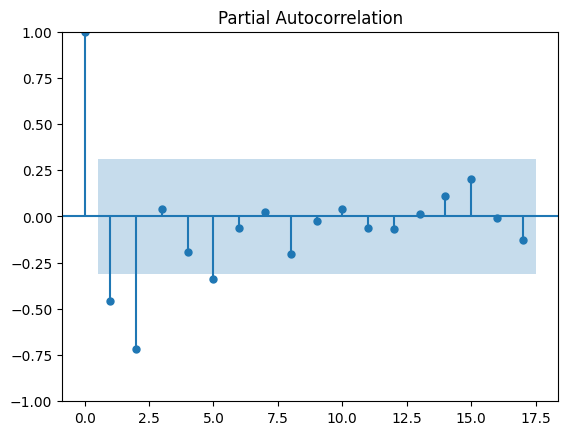

In [68]:
pacf = plot_pacf(stationary_data.dropna())

# p is 3 or 5